#### Enhanced sampling along $\phi$ and $\psi$ dihedrals of alanine dipeptide in vacuum using standard and well-tempered metadynamics with OpenMM and PySAGES
#### SD, Ferguson lab

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import mdtraj as md

import sys
sys.path.append("/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES-openmm/PySAGES/examples/meta/")
import analysis as ana

In [2]:
folderdir = "/home/sivadasetty/scratch-midway2/software/enhancements/SSAGES/PySAGES-openmm/PySAGES/examples/meta/openmm/"

#### Read hills files and calculate free energies

In [4]:
smeta = "./stand-no-grid-2/"
smeta_grid = "./stand-grid-2/"
wmeta = "./no-grid-2/"
wmeta_grid = "./grid-2/"


smeta_hillsFile = folderdir + smeta + "hills.dat"
smeta_grid_hillsFile = folderdir + smeta_grid + "hills.dat"
wmeta_hillsFile = folderdir + wmeta + "hills.dat"
wmeta_grid_hillsFile = folderdir + wmeta_grid + "hills.dat"

smeta_colvarFile = folderdir + smeta + "colvar.dat"
smeta_grid_colvarFile = folderdir + smeta_grid + "colvar.dat"
wmeta_colvarFile = folderdir + wmeta + "colvar.dat"
wmeta_grid_colvarFile = folderdir + wmeta_grid + "colvar.dat"

smeta_hillsData = pd.read_csv(smeta_hillsFile, delim_whitespace=True, comment="#", 
                              names=["time", "cv1", "cv2", "sigma1", "sigma2", "height"])
smeta_grid_hillsData = pd.read_csv(smeta_grid_hillsFile, delim_whitespace=True, comment="#", 
                              names=["time", "cv1", "cv2", "sigma1", "sigma2", "height"])
wmeta_hillsData = pd.read_csv(wmeta_hillsFile, delim_whitespace=True, comment="#", 
                              names=["time", "cv1", "cv2", "sigma1", "sigma2", "height"])
wmeta_grid_hillsData = pd.read_csv(wmeta_grid_hillsFile, delim_whitespace=True, comment="#", 
                              names=["time", "cv1", "cv2", "sigma1", "sigma2", "height"])

s_hills = [smeta_hillsData, smeta_grid_hillsData]
w_hills = [wmeta_hillsData, wmeta_grid_hillsData]


smeta_colvarData = pd.read_csv(smeta_colvarFile, delim_whitespace=True, comment="#", 
                               names=["time", "cv1", "cv2", "bias"])
smeta_grid_colvarData = pd.read_csv(smeta_grid_colvarFile, delim_whitespace=True, comment="#", 
                               names=["time", "cv1", "cv2", "bias"])
wmeta_colvarData = pd.read_csv(wmeta_colvarFile, delim_whitespace=True, comment="#", 
                               names=["time", "cv1", "cv2", "bias"])
wmeta_grid_colvarData = pd.read_csv(wmeta_grid_colvarFile, delim_whitespace=True, comment="#", 
                               names=["time", "cv1", "cv2", "bias"])

s_colvar = [smeta_colvarData, smeta_grid_colvarData]
w_colvar = [wmeta_colvarData, wmeta_grid_colvarData]

#### plot $\phi$ and $\psi$ at hill strides

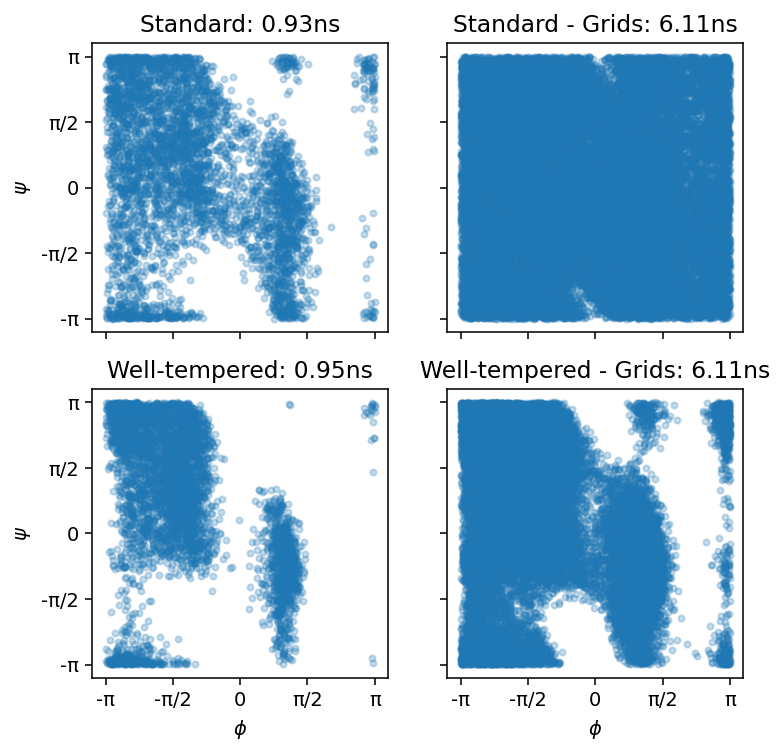

In [6]:
fig, axes = plt.subplots(figsize=(6,6), dpi=140, nrows=2, ncols=2, sharex=True, sharey=True, )

angles = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
for j in range(2):
    for i in range(2):
        if j == 0:
            axes[j][i].scatter(s_colvar[i].cv1, s_colvar[i].cv2, s=10, alpha=0.25)
        elif j == 1:
            axes[j][i].scatter(w_colvar[i].cv1, w_colvar[i].cv2, s=10, alpha=0.25)
        if i == 0:
            axes[j][0].set_ylabel(r'$\psi$')
            axes[j][0].set_yticks(angles)
            axes[j][0].set_yticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
        if j == 1:
            axes[j][i].set_xlabel(r'$\phi$')
            axes[j][i].set_xticks(angles)
            axes[j][i].set_xticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
            
        #axes[j][i].set(adjustable='box', aspect='equal')


axes[0][0].set_title("Standard: " + str(np.round(s_colvar[0].time.max()*2*1e-6, 2)) + "ns")
axes[0][1].set_title("Standard - Grids: " + str(np.round(w_colvar[1].time.max()*2*1e-6, 2)) + "ns")
axes[1][0].set_title("Well-tempered: " + str(np.round(w_hills[0].time.max()*2*1e-6, 2)) + "ns")
axes[1][1].set_title("Well-tempered - Grids: " + str(np.round(w_colvar[1].time.max()*2*1e-6, 2)) + "ns")

plt.savefig('Figures/adp-vac-sampling-w-1dt2-s-0dt35-stride-500-grids-50.png', bbox_inches = "tight")

#### plot height of bias with time

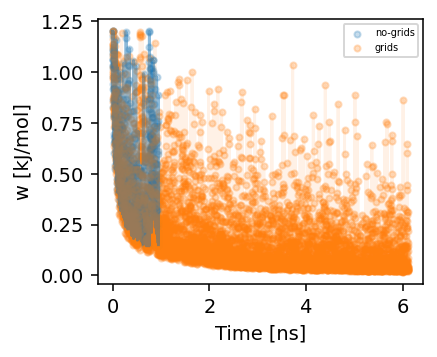

In [7]:
fig, axes = plt.subplots(figsize=(3,2.5), dpi=140, nrows=1, ncols=1, sharex=False, sharey=True)

angles = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
labels=["no-grids", "grids"]
for i in range(2):
    axes.scatter(w_hills[i].time*2*1e-6, w_hills[i].height, s=10, alpha=0.25, label=labels[i])
    if i == 0:
        alpha=0.5
    else:
        alpha=0.1
    axes.plot(w_hills[i].time*2*1e-6, w_hills[i].height, alpha=alpha);

axes.legend(fontsize=5)
angles = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
axes.set_ylabel('w [kJ/mol]')
axes.set_xlabel('Time [ns]')

plt.savefig('Figures/adp-vac-height-w-1dt2-s-0dt35-stride-500-grids-50.png', bbox_inches = "tight")

#### calculate free energy using sum hills

In [ ]:
x1, x2 = np.mgrid[-math.pi:math.pi:0.2, -math.pi:math.pi:0.2]
x = np.vstack((x1.flatten(), x2.flatten())).T

scaling = (298.15+1500)/1500

smeta_fes = ana.sum_gaussians(x, smeta_hillsData.values[:,[1,2]], smeta_hillsData.values[:,[3,4]], smeta_hillsData.height, 2, [True, True])
smeta_grid_fes = ana.sum_gaussians(x, smeta_grid_hillsData.values[:,[1,2]], smeta_grid_hillsData.values[:,[3,4]], smeta_grid_hillsData.height, 2, [True, True])
wmeta_fes = scaling*ana.sum_gaussians(x, wmeta_hillsData.values[:,[1,2]], wmeta_hillsData.values[:,[3,4]], wmeta_hillsData.height, 2, [True, True])
wmeta_grid_fes = scaling*ana.sum_gaussians(x, wmeta_grid_hillsData.values[:,[1,2]], wmeta_grid_hillsData.values[:,[3,4]], wmeta_grid_hillsData.height, 2, [True, True])

In [ ]:
s_fes = [smeta_fes, smeta_grid_fes]
w_fes = [wmeta_fes, wmeta_grid_fes]
scaling

#### plot free energies

Text(0.5, 1.0, 'Well-tempered - Grids: 5.94ns')

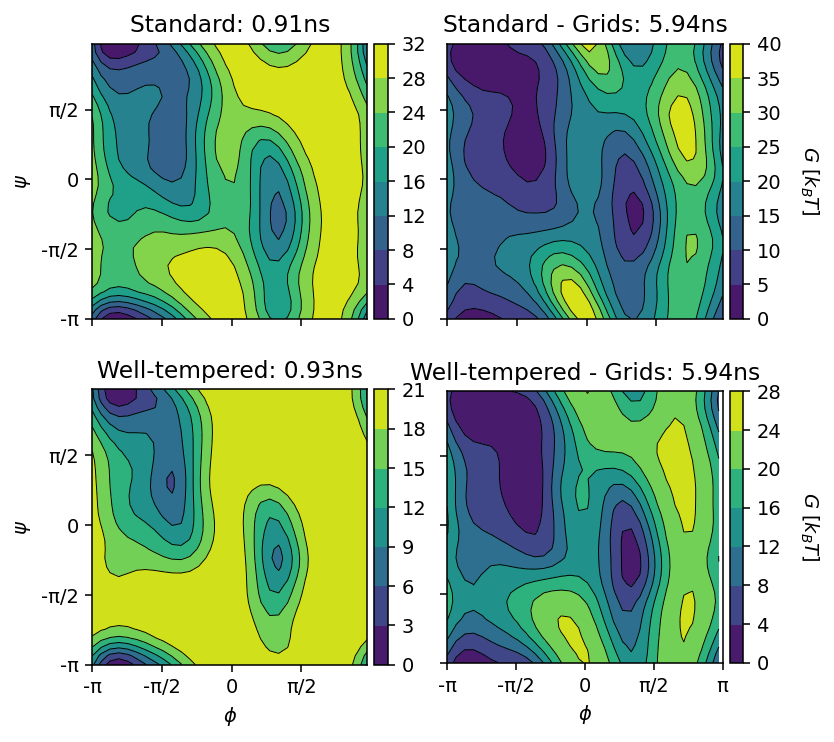

In [191]:
fig, axes = plt.subplots(figsize=(6,6), dpi=140, nrows=2, ncols=2, sharex=True, sharey=True, )

kt = 298.15*8.314462618*1e-3
angles = np.arange(-math.pi , math.pi + 0.1, step=(math.pi/2))
for j in range(2):
    for i in range(2):
        if j == 0:
            a = axes[j][i].contourf(x1, x2, -s_fes[i].reshape(x1.shape[0], x1.shape[1])/kt +
             s_fes[i].max()/kt, cmap='viridis') #vmin=0, vmax=40
            
            divider = make_axes_locatable(axes[j][i])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            cbar = fig.colorbar(a, cax=cax, orientation='vertical')
            
            axes[j][i].contour(x1, x2, -s_fes[i].reshape(x1.shape[0], x1.shape[1])/kt +
             s_fes[i].max()/kt, colors=line_colors, linewidths=0.5)
            
        elif j == 1:
            a = axes[j][i].contourf(x1, x2, -w_fes[i].reshape(x1.shape[0], x1.shape[1])/kt +
             w_fes[i].max()/kt, cmap='viridis') #vmin=0, vmax=40
            
            divider = make_axes_locatable(axes[j][i])
            cax = divider.append_axes('right', size='5%', pad=0.05)
            cbar = fig.colorbar(a, cax=cax, orientation='vertical')
            
            axes[j][i].contour(x1, x2, -w_fes[i].reshape(x1.shape[0], x1.shape[1])/kt +
             w_fes[i].max()/kt, colors=line_colors, linewidths=0.5)
            
            
        if i == 0:
            axes[j][0].set_ylabel(r'$\psi$')
            axes[j][0].set_yticks(angles)
            axes[j][0].set_yticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
        if j == 1:
            axes[j][i].set_xlabel(r'$\phi$')
            axes[j][i].set_xticks(angles)
            axes[j][i].set_xticklabels(['-π', '-π/2', '0', 'π/2', 'π'])
            
        if i == 1:
            cbar.ax.set_ylabel(r'$G$ $[k_{B}T]$', rotation=270, labelpad=20)

            
        axes[j][i].set(adjustable='box', aspect='equal')

axes[0][0].set_title("Standard: " + str(np.round(s_colvar[0].time.max()*2*1e-6, 2)) + "ns")
axes[0][1].set_title("Standard - Grids: " + str(np.round(w_colvar[1].time.max()*2*1e-6, 2)) + "ns")
axes[1][0].set_title("Well-tempered: " + str(np.round(w_hills[0].time.max()*2*1e-6, 2)) + "ns")
axes[1][1].set_title("Well-tempered - Grids: " + str(np.round(w_colvar[1].time.max()*2*1e-6, 2)) + "ns")

plt.savefig('Figures/adp-vac-fes-w-1dt2-s-0dt35-stride-500-grids-50.png', bbox_inches = "tight")